# Crime Data Analysis (Exploratory Data Analysis)
In this project crime data has been analzed that was collected by Chicago Police Department. The dataset was downloaded as a JSON file and converted into CSV. After collection, data was processed, cleaned, analyzed and visualized. The Complete project is divided into following five steps.

# 1) Ask
In this step problem statement was defined and expectations of the projects were discussed. The main motive behind this project was to analyze the available data and find hidden trends or patterns that could be useful for decision making process for higher authorities.

# 2) Prepare
In this step data was collected from Chicago crime website in JSON formate and converted into csv.

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import datetime as dt
import calendar as cal

In [2]:
with open("C:/Users/mubas/Downloads/crime.json") as json_file:
    jsondata = json.load(json_file)

Converting json into CSV formate

In [3]:
data_file = open('C:/Users/mubas/Downloads/crimeCSV3.csv', 'w', newline='')
csv_writer = csv.writer(data_file)
count = 0
for data in jsondata:
    if count == 0:
        header = data.keys()
        csv_writer.writerow(header)
        count += 1
    csv_writer.writerow(data.values())
data_file.close()


Taking Birds eye view of data

In [4]:
crimeData=pd.read_csv("C:/Users/mubas/Downloads/crimeCSV3.csv")
print(crimeData.head(25000))
print(crimeData.shape)
print(crimeData.values)
print(crimeData.dtypes)
print(crimeData.describe())

       unique_key case_number                date                       block  \
0            3750    HM552534   8/21/2006 6:50:00         104XX S CORLISS AVE   
1           26735    JF225985  4/30/2022 11:19:00            005XX E 106TH ST   
2           20371    HP624145   4/17/2012 5:17:00            003XX W 104TH PL   
3           25831    JE181828  3/28/2021 12:11:00            007XX E 103RD ST   
4           26284    JE372655   9/14/2021 1:23:00            002XX W 107TH ST   
...           ...         ...                 ...                         ...   
24995     4202044    HL532284     06/08/2005 6:00  002XX W MONTROSE HARBOR DR   
24996     4266340    HL583328  8/29/2005 10:00:00       039XX N LAKE SHORE DR   
24997     5692437    HN501917    01/08/2007 12:00         007XX W SHERIDAN RD   
24998     3473562    HK542531    07/08/2004 10:00       036XX N RECREATION DR   
24999     1634771     G416047  7/14/2001 11:00:00            037XX N BROADWAY   

      iucr primary_type    

Our data contains 25000 rows and 22 columns. Column names need to be renamed. Our data is consisted of boolean, int and object data types. Unfortunately, we can't find statistical information because of categorial nature of data.

# 3) Process
After data collection, data was cleaned to make sure that there is no redundancy, duplicate values, irrelevance and misspellings. And above all, data is made bias free. 

In [5]:
columns = list(crimeData.columns)
print(columns)

crimeData.rename(columns={"unique_key": "Id","case_number": "Case Number","date": "Date","block":"Block",
                          "iucr":"IUCR Code","primary_type":"Crime Type","description":"Crime Description",
                          "location_description":"Location Detail","arrest":"Arrested","domestic":"Domestic","beat":"Area Code",
                          "district":"District Number","ward":"Ward Number", "community_area":"Community Area",
                          "fbi_code":"FBI Code","year":"Year","updated_on":"Recorded On","location":"Location"
                          },inplace=True)
print(crimeData.head(5))

['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']
      Id Case Number                Date                Block IUCR Code  \
0   3750    HM552534   8/21/2006 6:50:00  104XX S CORLISS AVE       110   
1  26735    JF225985  4/30/2022 11:19:00     005XX E 106TH ST       110   
2  20371    HP624145   4/17/2012 5:17:00     003XX W 104TH PL       110   
3  25831    JE181828  3/28/2021 12:11:00     007XX E 103RD ST       110   
4  26284    JE372655   9/14/2021 1:23:00     002XX W 107TH ST       110   

  Crime Type    Crime Description Location Detail  Arrested Domestic  ...  \
0   HOMICIDE  FIRST DEGREE MURDER          STREET      True    False  ...   
1   HOMICIDE  FIRST DEGREE MURDER           ALLEY      True    False  ...   
2   HOMICIDE  FIRST DEGREE MURDER    

Columns are renamed to avoid misspelling and inconsistency in named convention.

In [6]:
print(crimeData.info())
print(crimeData.info(verbose=True))

print(crimeData.isnull().sum())
print("Percentage of null data",crimeData.isnull().sum()/25000*100)
print(crimeData.isnull().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 25000 non-null  int64 
 1   Case Number        25000 non-null  object
 2   Date               25000 non-null  object
 3   Block              25000 non-null  object
 4   IUCR Code          25000 non-null  object
 5   Crime Type         25000 non-null  object
 6   Crime Description  25000 non-null  object
 7   Location Detail    25000 non-null  object
 8   Arrested           25000 non-null  bool  
 9   Domestic           25000 non-null  object
 10  Area Code          25000 non-null  int64 
 11  District Number    25000 non-null  int64 
 12  Ward Number        25000 non-null  object
 13  Community Area     25000 non-null  int64 
 14  FBI Code           25000 non-null  object
 15  x_coordinate       24904 non-null  object
 16  y_coordinate       24896 non-null  objec

As it is obvious that following column names contains null values.

x_coordinate           96
y_coordinate          104
Year                  322
Recorded On           322
latitude              322
longitude            2281
Location             2290

Now, values of these columns can't be substituted by using imputation method or using mean or median. Luckly, these columns are not going to effect analysis so it would be safe to delete these columns. 

In [7]:
print(crimeData.loc[crimeData ['longitude'].isnull() == True])
print(crimeData.loc[crimeData['Recorded On'].isnull()==True])

print("duplicated data in the dataset",crimeData.duplicated(keep='first'))
print("dropping all duplicates rows from data",crimeData.drop_duplicates())

crimeData3 = crimeData.copy()
crimeData3["longitude"].fillna("Nan",inplace=True)
crimeData3["latitude"].fillna("Nan",inplace=True)
crimeData3["Location"].fillna("Nan",inplace=True)
print(crimeData3.drop(crimeData3[crimeData3['longitude']=="Nan"].index, inplace = True))
print(crimeData3.drop(crimeData3[crimeData3['latitude']=="Nan"].index, inplace = True))
print(crimeData3.drop(crimeData3[crimeData3['Location']=="Nan"].index, inplace = True))

crimeData.to_csv("C:/Users/mubas/Downloads/crimeCSV3.csv", index=False)

            Id Case Number                 Date                       Block  \
8      1661228     G447819    7/30/2001 3:36:18              001XX E 104 ST   
73     1915104     G776474   12/29/2001 7:16:36             107XX S KING DR   
77     1661157     G450129    7/31/2001 1:11:04            104XX S STATE ST   
97     1851184     G691103  11/17/2001 12:22:55         105XX S MARYLAND AV   
119    1665117     G453628      01/08/2001 3:38        103XX S WENTWORTH AV   
...        ...         ...                  ...                         ...   
24969  1945519    HH132990      09/01/2002 4:45      006XX W IRVING PARK RD   
24972  2027255    HH235368     10/03/2002 10:00      006XX W IRVING PARK RD   
24974  1551174     G308168    5/28/2001 3:30:00  002XX W MONTROSE HARBOR DR   
24983  1361173     G066982      01/02/2001 8:49       036XX N LAKE SHORE DR   
24999  1634771     G416047   7/14/2001 11:00:00            037XX N BROADWAY   

      IUCR Code           Crime Type               

Duplicated values are checked and dropped from the dataset. 

# Feature Engineering
To analyze the data, we need date and month in different column. From date column that contain date and time, two different columns are derived by name "Month" and "Date 2. A new column area  is also derived from block column.

In [8]:
completeDate=crimeData3["Date"].str.split(" ", n=1, expand=True)
crimeData3["Date 2"]=completeDate[0]
crimeData3["Time"]=completeDate[1]
crimeData3.drop(columns=["Date"], inplace=True)
crimeData3['Month']=pd.DatetimeIndex(crimeData3['Date 2']).month
crimeData3["DayFromDate"]=pd.to_datetime(crimeData3["Date 2"])
crimeData3["Day"]=crimeData3["DayFromDate"].dt.day_name()

blockColumn=crimeData3["Block"].str.split(" ", n=2, expand=True)
print(blockColumn)
crimeData3["Area"]=blockColumn[2]
print(crimeData3.head(25000))

crimeData3.to_csv("C:/Users/mubas/Downloads/crimeCSV3.csv", index=False)

print(crimeData3.head(25000))
print(crimeData3.fillna("null"))
print(crimeData3.isnull().sum())

           0  1                   2
0      104XX  S         CORLISS AVE
1      005XX  E            106TH ST
2      003XX  W            104TH PL
3      007XX  E            103RD ST
4      002XX  W            107TH ST
...      ... ..                 ...
24994  006XX  W      IRVING PARK RD
24995  002XX  W  MONTROSE HARBOR DR
24996  039XX  N       LAKE SHORE DR
24997  007XX  W         SHERIDAN RD
24998  036XX  N       RECREATION DR

[22710 rows x 3 columns]
            Id Case Number                       Block IUCR Code Crime Type  \
0         3750    HM552534         104XX S CORLISS AVE       110   HOMICIDE   
1        26735    JF225985            005XX E 106TH ST       110   HOMICIDE   
2        20371    HP624145            003XX W 104TH PL       110   HOMICIDE   
3        25831    JE181828            007XX E 103RD ST       110   HOMICIDE   
4        26284    JE372655            002XX W 107TH ST       110   HOMICIDE   
...        ...         ...                         ...       ...    

In [9]:
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'CRIM SEXUAL ASSAULT' : 'Sexual Assault'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'CRIMINAL SEXUAL ASSAULT' : 'Sexual Assault'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'PUBLIC PEACE VIOLATION' : 'Peace Violation'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'MOTOR VEHICLE THEFT' : 'Vehicle Theft'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'OFFENSE INVOLVING CHILDREN' : 'Children Offense'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'LIQUOR LAW VIOLATION' : 'Liqour Violation'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'INTERFERENCE WITH PUBLIC OFFICER' : 'Officer Offense'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'CONCEALED CARRY LICENSE VIOLATION' : 'License Violation'})
crimeData3["Crime Type"]=crimeData3["Crime Type"].replace({'NON-CRIMINAL (SUBJECT SPECIFIED)' : 'NON-CRIMINAL'})

In the above mentioned chunk, each crime type name is replaced by a specific concise name.

In [10]:
missing_values = list(crimeData3.isna().sum())

cols = list(crimeData3.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) 

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) 
missing_vals.head()

Number of Missing Values per feature >>


,Others
Missing Values,0


#  4) Analyze
Once data has been processed (cleaned), next step is to analyze that cleaned data. 

Most Committed Crimes:

value of temp1             Crime Type  Case Number
0                ARSON           43
1              ASSAULT         1785
2              BATTERY         4664
3             BURGLARY         1257
4      CRIMINAL DAMAGE         2691
5    CRIMINAL TRESPASS          497
6     Children Offense          201
7   DECEPTIVE PRACTICE          752
8             GAMBLING           25
9             HOMICIDE           54
10        INTIMIDATION           24
11          KIDNAPPING           23
12   License Violation            3
13    Liqour Violation           53
14           NARCOTICS         2113
15      NON - CRIMINAL            1
16        NON-CRIMINAL            3
17           OBSCENITY            2
18       OTHER OFFENSE         1486
19     Officer Offense           68
20        PROSTITUTION          219
21     Peace Violation          250
22             ROBBERY          865
23         SEX OFFENSE           99
24            STALKING            7
25      Sexual Assault           89
26           

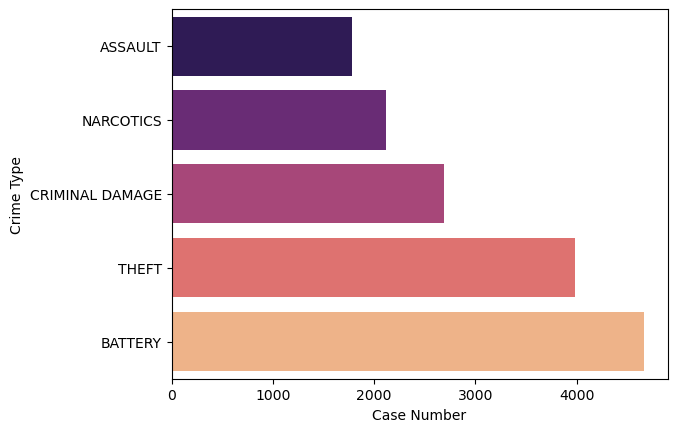

In [11]:
temp1 = crimeData3.groupby('Crime Type', as_index=False).agg({"Case Number": "count"})
print("value of temp1",temp1)
temp2 = temp1.sort_values(by=['Case Number'], ascending=False).head()
print("value of temp2",temp2)
temp3 = temp2.sort_values(by='Case Number', ascending=True)
print("value of temp3",temp3)
sns.barplot(x='Case Number', y='Crime Type', data=temp3, palette="magma")
plt.show()


Occurance of Crime

2001      14
2023     223
2021     592
2020     605
2022     619
2017     680
2019     716
2016     731
2015     733
2014     754
2018     755
2013     838
2012    1033
2011    1182
2002    1183
2010    1313
2009    1346
2008    1452
2006    1536
2007    1557
2004    1600
2003    1606
2005    1642
Name: Year, dtype: int64


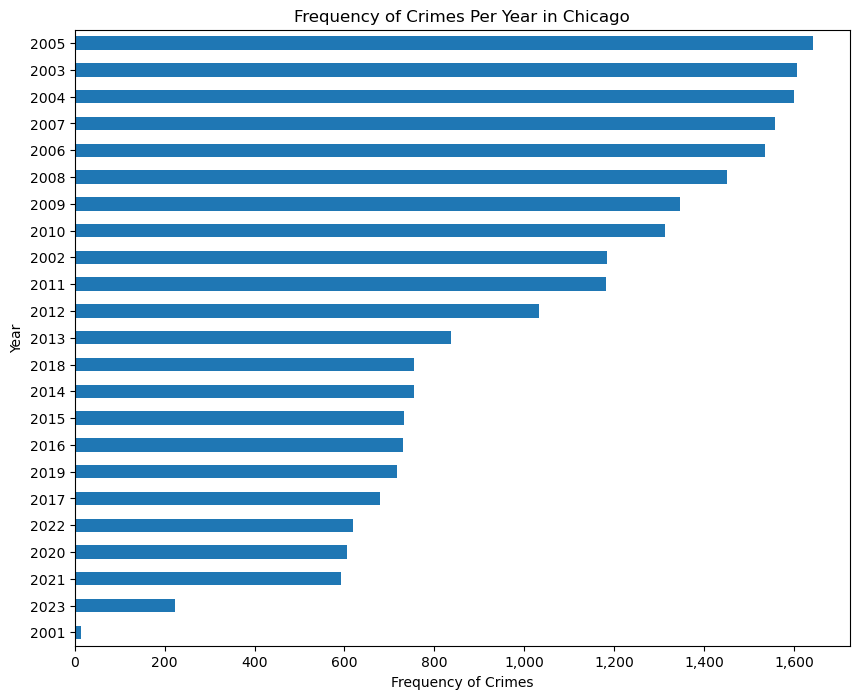

In [12]:
crimeByYear = crimeData3['Year'].value_counts(ascending=True)
print(crimeByYear)

fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crimeByYear.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

 Ratio of arrested criminals over total crimes

False    72.923822
True     27.076178
Name: Arrested, dtype: float64


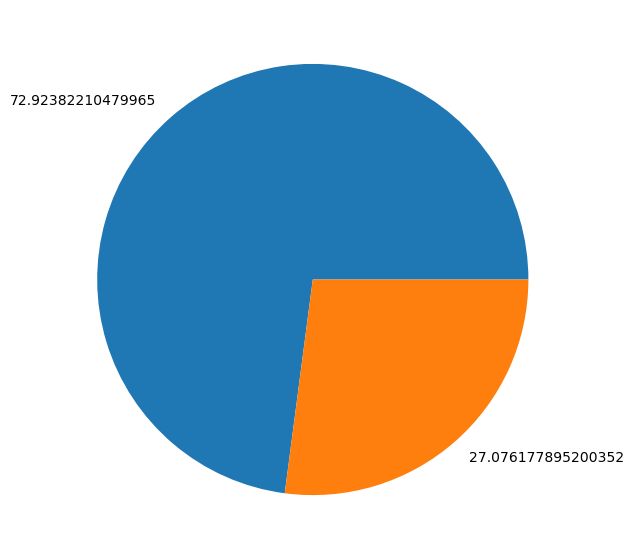

In [13]:
arrested = crimeData3['Arrested'].value_counts()
arrest_percent = (arrested/crimeData3['Arrested'].count()) * 100
print(arrest_percent)
fig2 = plt.figure(figsize=(10, 7))
pieChartLabels=[arrest_percent[0],arrest_percent[1]]
plt.pie(arrest_percent, labels=pieChartLabels)
plt.show()

Number of Crimes by Month

crime per month size Month  Crime Type       
1      ARSON                  4
       ASSAULT              127
       BATTERY              314
       BURGLARY              97
       CRIMINAL DAMAGE      199
                           ... 
12     SEX OFFENSE           10
       Sexual Assault         6
       THEFT                295
       Vehicle Theft         73
       WEAPONS VIOLATION     38
Length: 300, dtype: int64
crime per months sorted:::            Month       Crime Type  counts
Month                                    
1     23       1            THEFT     342
      2        1          BATTERY     314
      4        1  CRIMINAL DAMAGE     199
2     28       2          BATTERY     357
      48       2            THEFT     291
      39       2        NARCOTICS     191
3     53       3          BATTERY     400
      74       3            THEFT     320
      55       3  CRIMINAL DAMAGE     219
4     79       4          BATTERY     425
      97       4            THEFT     321
   

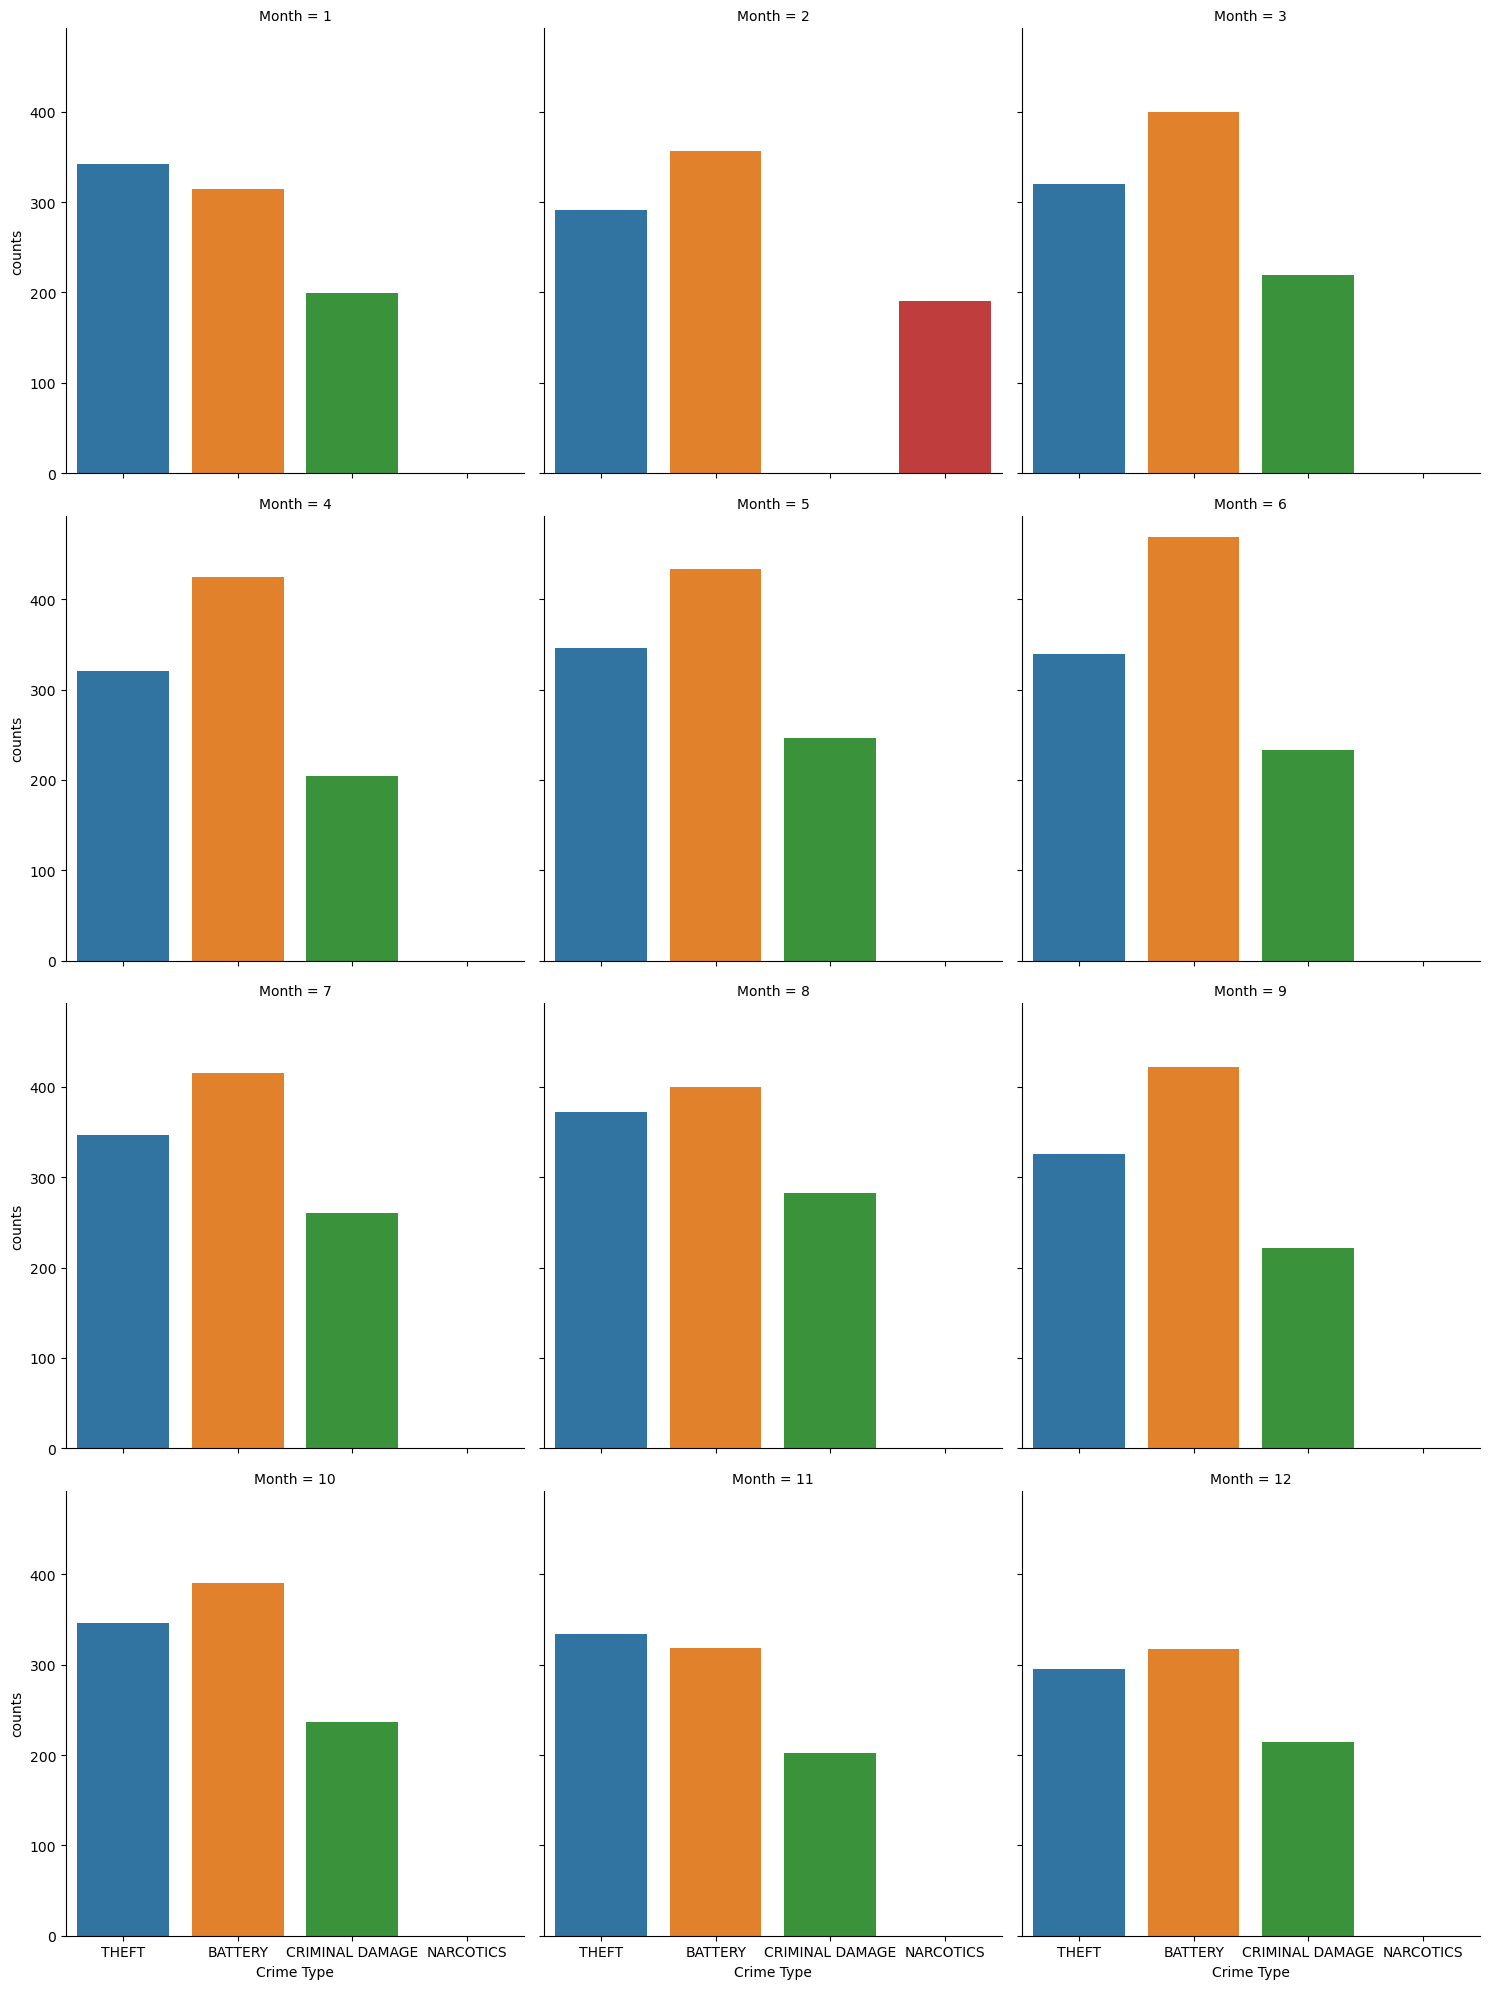

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [14]:
crimePerMonth=crimeData3.groupby(['Month','Crime Type']).size()
print("crime per month size",crimePerMonth)
crimePerMonthSorted=crimePerMonth.reset_index(name='counts').groupby('Month').apply(lambda  x: x.sort_values('counts', ascending=False).head(3))
print("crime per months sorted:::",crimePerMonthSorted)

g =sns.catplot(x="Crime Type", y='counts', col="Month", col_wrap=3,
                   data=crimePerMonthSorted, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')
    plt.show()
    plt.subplots_adjust(hspace=0.4)

Total numbers of Crimes by Location Detail

value of temp1                                        Location Detail  Case Number
0                                   ABANDONED BUILDING           44
1                                                ALLEY          521
2                                      ANIMAL HOSPITAL            5
3                                            APARTMENT         1887
4                                      APPLIANCE STORE            7
..                                                 ...          ...
104  VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER...            2
105                             VEHICLE NON-COMMERCIAL          388
106                                 VEHICLE-COMMERCIAL           18
107                                          WAREHOUSE           34
108                                               YARD            1

[109 rows x 2 columns]
value of temp2    Location Detail  Case Number
97          STREET         6224
76       RESIDENCE         5230
94        SIDEWALK         2377
3 

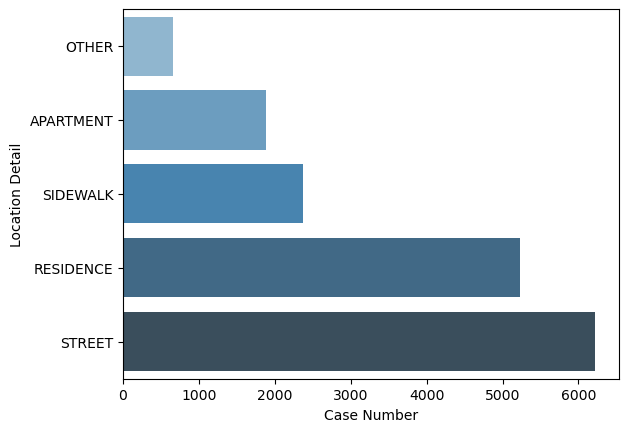

In [15]:
temp1 = crimeData3.groupby('Location Detail', as_index=False).agg({"Case Number": "count"})
print("value of temp1",temp1)
temp2 = temp1.sort_values(by=['Case Number'], ascending=False).head()
print("value of temp2",temp2)
temp3 = temp2.sort_values(by='Case Number', ascending=True)
print("value of temp3",temp3)
sns.barplot(x='Case Number', y='Location Detail', data=temp3, palette="Blues_d")
plt.show()

Numbers of Crime grouped by Area

value of temp1              Area  Case Number
0        103RD PL           82
1        103RD ST          243
2        104TH PL           72
3        104TH ST          193
4        105TH PL           47
..            ...          ...
259  WISCONSIN ST            2
260   WOLCOTT AVE           11
261       WOOD ST           13
262  WOODLAWN AVE            7
263      YALE AVE          208

[264 rows x 2 columns]
value of temp2               Area  Case Number
190   MICHIGAN AVE          606
232       STATE ST          518
250  WENTWORTH AVE          498
17        111TH ST          428
97       CERMAK RD          420
value of temp3               Area  Case Number
97       CERMAK RD          420
17        111TH ST          428
250  WENTWORTH AVE          498
232       STATE ST          518
190   MICHIGAN AVE          606


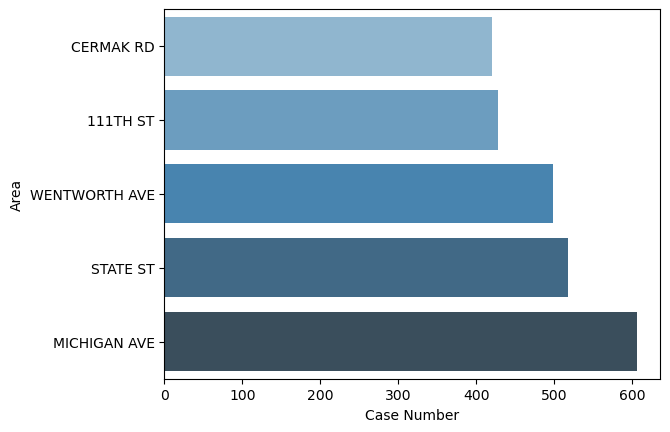

In [16]:
temp1 = crimeData3.groupby('Area', as_index=False).agg({"Case Number": "count"})
print("value of temp1",temp1)
temp2 = temp1.sort_values(by=['Case Number'], ascending=False).head()
print("value of temp2",temp2)
temp3 = temp2.sort_values(by='Case Number', ascending=True)
print("value of temp3",temp3)
sns.barplot(x='Case Number', y='Area', data=temp3, palette="Blues_d")
plt.show()

Numbers of Crime on Each Day

value of temp1          Day  Case Number
0     Friday         3345
1     Monday         3221
2   Saturday         3300
3     Sunday         3284
4   Thursday         3209
5    Tuesday         3191
6  Wednesday         3160
value of temp2         Day  Case Number
0    Friday         3345
2  Saturday         3300
3    Sunday         3284
1    Monday         3221
4  Thursday         3209
value of temp3         Day  Case Number
4  Thursday         3209
1    Monday         3221
3    Sunday         3284
2  Saturday         3300
0    Friday         3345


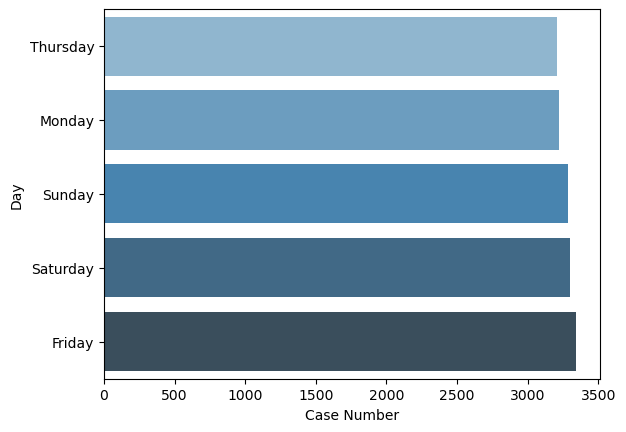

In [17]:
temp1 = crimeData3.groupby('Day', as_index=False).agg({"Case Number": "count"})
print("value of temp1",temp1)
temp2 = temp1.sort_values(by=['Case Number'], ascending=False).head()
print("value of temp2",temp2)
temp3 = temp2.sort_values(by='Case Number', ascending=True)
print("value of temp3",temp3)
sns.barplot(x='Case Number', y='Day', data=temp3, palette="Blues_d")
plt.show()

Percentage of Successful arrest 

In [18]:
arrest_per_year = crimeData3.groupby('Year')['Arrested'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
print(arrest_per_year)

      Arrested  Counts  Percentage
Year                              
2001     False      13   92.857143
2001      True       1    7.142857
2002     False     845   71.428571
2002      True     338   28.571429
2003     False    1145   71.295143
2003      True     461   28.704857
2004     False    1094   68.375000
2004      True     506   31.625000
2005     False    1114   67.844093
2005      True     528   32.155907
2006     False    1056   68.750000
2006      True     480   31.250000
2007     False    1059   68.015414
2007      True     498   31.984586
2008     False    1115   76.790634
2008      True     337   23.209366
2009     False    1011   75.111441
2009      True     335   24.888559
2010     False     952   72.505712
2010      True     361   27.494288
2011     False     867   73.350254
2011      True     315   26.649746
2012     False     709   68.635044
2012      True     324   31.364956
2013     False     583   69.570406
2013      True     255   30.429594
2014     False     5

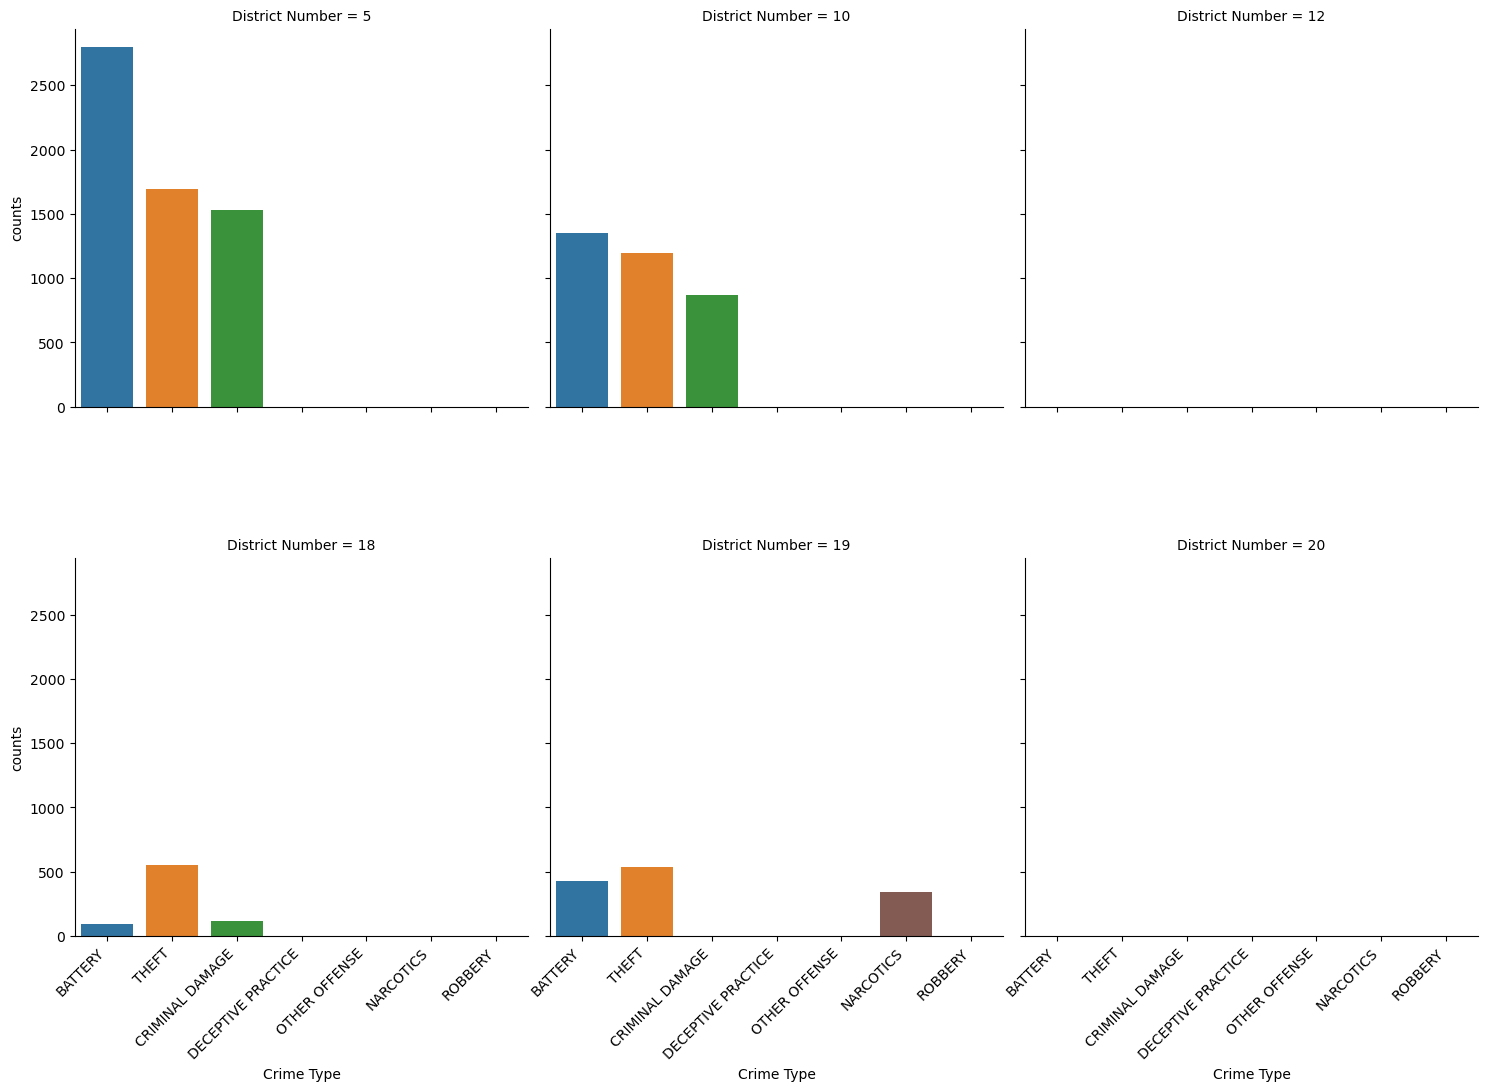

In [19]:
top = crimeData3.groupby(['District Number', 'Crime Type']).size().reset_index(name='counts').groupby('District Number').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
g =sns.catplot(x="Crime Type", y='counts', col="District Number", col_wrap=3,
                    data=top, kind='bar')
#g=sns.countplot(data=top,x='Crime Type', y='counts')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')
plt.subplots_adjust(hspace=0.4)